In [32]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import sys
import os
import tensorflow as tf

In [5]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 1. 데이터 확인

In [38]:
# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [39]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [40]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [41]:
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


### MNIST 데이터 확인해보기

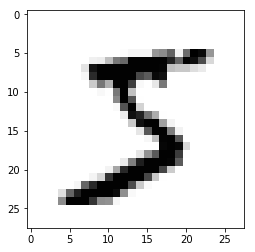

In [42]:
# 그래프로 확인 : 28픽셀 x 28픽셀 = 784픽셀
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [43]:
Y_class_train[0]

5

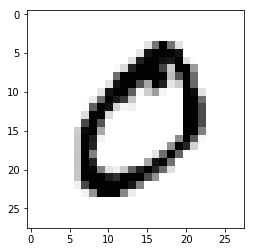

In [44]:
# 그래프로 확인 : 28픽셀 x 28픽셀 = 784픽셀
import matplotlib.pyplot as plt
plt.imshow(X_train[1], cmap='Greys')
plt.show()

In [45]:
# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


## ★-> 784개의 속성(28x28)을 이용해 10개 클래스(0~9)를 맞추는 문제가 되었다

# 2. 데이터 전처리

## 차원 변환: X값 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔야 함: .reshape() 함수

### X_train 차원축소(2->1), 정규화

In [46]:
# X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255  # reshape(총 샘플 수, 1차원 속성 수)

In [47]:
X_train.shape

(60000, 28, 28)

In [48]:
# 2차원 -> 1차원으로 변환
X_train = X_train.reshape(X_train.shape[0], 784)  
X_train.shape

(60000, 784)

In [49]:
# 정규화를 위해 실수형으로 변환
X_train = X_train.astype('float64')
X_train.shape

(60000, 784)

In [50]:
# 정규화(normalization)
X_train = X_train / 255
X_train.shape

(60000, 784)

### X_test 차원축소(2->1), 정규화

In [51]:
# X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [52]:
X_test.shape

(10000, 28, 28)

In [53]:
# 2차원 -> 1차원으로 변환
X_test = X_test.reshape(X_test.shape[0], 784)  # reshape(총 샘플 수, 1차원 속성 수)
X_test.shape

(10000, 784)

In [54]:
# 정규화를 위해 실수형으로 변환
X_test = X_test.astype('float64')
X_test.shape

(10000, 784)

In [55]:
# 정규화(normalization)
X_test = X_test / 255
X_test.shape

(10000, 784)

In [56]:
# 클래스 값 확인
print("class : %d " % (Y_class_train[0]))

class : 5 


## Y 레이블 값들을 원-핫 인코딩

In [57]:
# np_utils.to_categorical(클래스, 클래스의 갯수)
Y_train = np_utils.to_categorical(Y_class_train, 10)

In [58]:
print(Y_class_train[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [59]:
print(Y_class_train[1])
print(Y_train[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [60]:
# np_utils.to_categorical(클래스, 클래스의 갯수)
Y_test = np_utils.to_categorical(Y_class_test, 10)
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## -> 데이터 전처리 끝. 이제 딥러닝을 실행할 차례

# 3. 딥러닝 구조 만들기

In [62]:
# step1. 층마다 학습환경 세팅하기
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 4. 모델 컴파일

In [63]:
# step2. 모델 compile
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 5. 모델 최적화 설정

In [64]:
# step3. 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 6. 학습 및 결과 출력

In [71]:
# step4. 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


# step5. 결과 출력

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.